In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
df["species"].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [12]:
mydict = {
    "setosa":0,
    "virginica":1,
    "versicolor":2
}

In [13]:
df["Species"]=df["species"].map(mydict)

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [15]:
df.drop("species",axis=1,inplace=True)

In [16]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


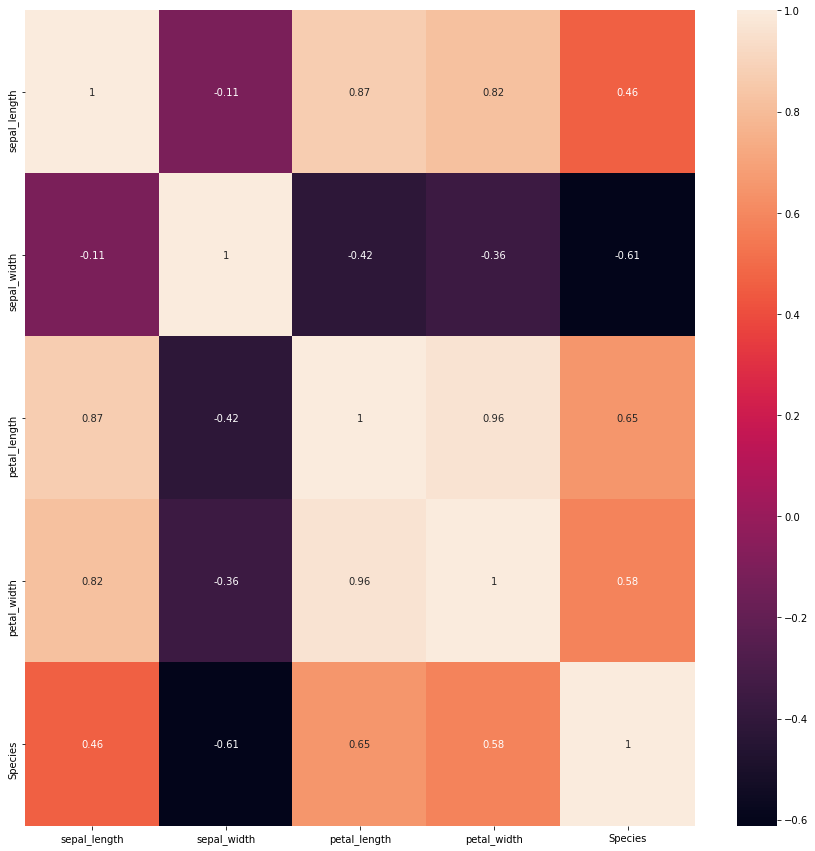

In [22]:
plt.figure(figsize = (15,15))
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot = True)

In [20]:
x=df.loc[:,["sepal_length","sepal_width","petal_length","petal_width"]].values
y=df.loc[:,["Species"]].values

In [18]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_stat)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression(solver='newton-cg',multi_class='ovr')

In [25]:
model.fit(x_train,y_train)

C:\Users\Dr. isha\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_pred = model.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [28]:
acc = accuracy_score(y_test,y_pred)

In [29]:
acc

0.8